#### 1. Preparing our Data for Analysis (Data Cleaning and Data preprocessing)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("hotel_bookings.csv")

In [4]:
df.sample(5)

hotel  is_canceled  lead_time  arrival_date_year  \
108251    City Hotel            0         33               2017   
4147    Resort Hotel            1         35               2016   
65823     City Hotel            1        248               2017   
16023   Resort Hotel            0         67               2015   
83746     City Hotel            0          5               2016   

       arrival_date_month  arrival_date_week_number  \
108251              March                        12   
4147             February                         8   
65823               April                        15   
16023              August                        31   
83746            February                         7   

        arrival_date_day_of_month  stays_in_weekend_nights  \
108251                         23                        0   
4147                           19                        0   
65823                           9                        2   
16023                           1                        4   
83746                          10                        0   

        stays_in_week_nights  adults  ...  deposit_type  agent company  \
108251                     2       3  ...    No Deposit   15.0     NaN   
4147                       2       2  ...    No Deposit  250.0     NaN   
65823                      0       2  ...    No Deposit   58.0     NaN   
16023                      6       2  ...    No Deposit  240.0     NaN   
83746                      1       1  ...    No Deposit    9.0     NaN   

       days_in_waiting_list    customer_type    adr  \
108251                    0        Transient  130.4   
4147                      0        Transient   99.0   
65823                     0  Transient-Party   80.0   
16023                     0        Transient  208.2   
83746                     0        Transient   86.0   

        required_car_parking_spaces  total_of_special_requests  \
108251                            0                          0   
4147                              0                          0   
65823                             0                          0   
16023                             0                          1   
83746                             0                          0   

        reservation_status reservation_status_date  
108251           Check-Out               3/25/2017  
4147               No-Show               2/19/2016  
65823             Canceled                4/4/2017  
16023            Check-Out               8/11/2015  
83746            Check-Out               2/11/2016  

[5 rows x 32 columns]

In [5]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [6]:
df.shape

(119390, 32)

In [7]:
df.isnull().any().any()

True

In [8]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [9]:
df.fillna(0, inplace=True)

In [10]:
df["meal"].value_counts()

meal
BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: count, dtype: int64

In [11]:
df["children"].unique()

array([ 0.,  1.,  2., 10.,  3.])

In [12]:
df["adults"].unique()

array([ 2,  1,  3,  4, 40, 26, 50, 27, 55,  0, 20,  6,  5, 10],
      dtype=int64)

In [13]:
df["babies"].unique()

array([ 0,  1,  2, 10,  9], dtype=int64)

In [14]:
filter1 = (df["children"]==0) & (df["adults"]==0) &  (df["babies"]==0)

In [15]:
data = df[~filter1].copy()

In [16]:
pd.options.display.max_columns = 33

In [17]:
data.sample(5)

hotel  is_canceled  lead_time  arrival_date_year  \
99477    City Hotel            0          2               2016   
65227    City Hotel            1         76               2017   
28220  Resort Hotel            0          0               2016   
97150    City Hotel            0         24               2016   
21549  Resort Hotel            0          2               2016   

      arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
99477            October                        42                         13   
65227              March                        13                         29   
28220          September                        39                         24   
97150          September                        38                         11   
21549              March                        10                          1   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  \
99477                        0                     1       1       0.0   
65227                        0                     4       2       0.0   
28220                        0                     1       2       2.0   
97150                        2                     0       2       0.0   
21549                        0                     2       2       0.0   

       babies meal country market_segment distribution_channel  \
99477       0   BB     ESP         Direct               Direct   
65227       0   BB     AUT      Online TA                TA/TO   
28220       0   BB     PRT      Online TA                TA/TO   
97150       0   BB     FRA      Online TA                TA/TO   
21549       0   BB     FIN         Direct               Direct   

       is_repeated_guest  previous_cancellations  \
99477                  0                       0   
65227                  0                       0   
28220                  0                       0   
97150                  0                       0   
21549                  0                       0   

       previous_bookings_not_canceled reserved_room_type assigned_room_type  \
99477                               0                  D                  D   
65227                               0                  E                  E   
28220                               0                  G                  G   
97150                               0                  D                  D   
21549                               0                  E                  E   

       booking_changes deposit_type  agent  company  days_in_waiting_list  \
99477                2   No Deposit    0.0      0.0                     0   
65227                0   No Deposit    9.0      0.0                     0   
28220                0   No Deposit  240.0      0.0                     0   
97150                0   No Deposit    9.0      0.0                     0   
21549                0   No Deposit    0.0      0.0                     0   

      customer_type     adr  required_car_parking_spaces  \
99477     Transient  170.00                            0   
65227     Transient  138.15                            0   
28220     Transient  195.00                            0   
97150     Transient  142.00                            1   
21549     Transient   65.00                            0   

       total_of_special_requests reservation_status reservation_status_date  
99477                          1          Check-Out              10/14/2016  
65227                          3           Canceled                2/6/2017  
28220                          0          Check-Out               9/25/2016  
97150                          1          Check-Out               9/13/2016  
21549                          0          Check-Out                3/3/2016

#### 2. Where do the guests come from & Perform Spatial Analysis on Guests Home Town

In [18]:
data.sample(3)

hotel  is_canceled  lead_time  arrival_date_year  \
915     Resort Hotel            0        139               2015   
112225    City Hotel            0          9               2017   
80507     City Hotel            1        221               2016   

       arrival_date_month  arrival_date_week_number  \
915                August                        32   
112225                May                        20   
80507                June                        24   

        arrival_date_day_of_month  stays_in_weekend_nights  \
915                             5                        0   
112225                         19                        1   
80507                          10                        1   

        stays_in_week_nights  adults  children  babies meal country  \
915                        4       2       0.0       0   BB     PRT   
112225                     2       2       0.0       0   SC     USA   
80507                      2       2       0.0       0   BB     PRT   

       market_segment distribution_channel  is_repeated_guest  \
915         Online TA                TA/TO                  0   
112225      Online TA                TA/TO                  0   
80507   Offline TA/TO                TA/TO                  0   

        previous_cancellations  previous_bookings_not_canceled  \
915                          0                               0   
112225                       0                               0   
80507                        1                               0   

       reserved_room_type assigned_room_type  booking_changes deposit_type  \
915                     A                  A                0   No Deposit   
112225                  A                  A                0   No Deposit   
80507                   A                  A                0   Non Refund   

        agent  company  days_in_waiting_list customer_type    adr  \
915     240.0      0.0                     0     Transient  172.0   
112225    9.0      0.0                     0     Transient  140.0   
80507     3.0      0.0                    15     Transient   80.0   

        required_car_parking_spaces  total_of_special_requests  \
915                               0                          1   
112225                            0                          3   
80507                             0                          0   

       reservation_status reservation_status_date  
915             Check-Out                8/9/2015  
112225          Check-Out               5/22/2017  
80507            Canceled              11/17/2015

In [19]:
data["hotel"].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [20]:
data["is_canceled"].unique()

array([0, 1], dtype=int64)

In [21]:
resort = data [(data["hotel"] == 'Resort Hotel') & (data['is_canceled'] == 0)]

city = data [(data["hotel"] == 'City Hotel') & (data['is_canceled'] == 0)]

In [22]:
resort

hotel  is_canceled  lead_time  arrival_date_year  \
0      Resort Hotel            0        342               2015   
1      Resort Hotel            0        737               2015   
2      Resort Hotel            0          7               2015   
3      Resort Hotel            0         13               2015   
4      Resort Hotel            0         14               2015   
...             ...          ...        ...                ...   
40055  Resort Hotel            0        212               2017   
40056  Resort Hotel            0        169               2017   
40057  Resort Hotel            0        204               2017   
40058  Resort Hotel            0        211               2017   
40059  Resort Hotel            0        161               2017   

      arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
0                   July                        27                          1   
1                   July                        27                          1   
2                   July                        27                          1   
3                   July                        27                          1   
4                   July                        27                          1   
...                  ...                       ...                        ...   
40055             August                        35                         31   
40056             August                        35                         30   
40057             August                        35                         29   
40058             August                        35                         31   
40059             August                        35                         31   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  \
0                            0                     0       2       0.0   
1                            0                     0       2       0.0   
2                            0                     1       1       0.0   
3                            0                     1       1       0.0   
4                            0                     2       2       0.0   
...                        ...                   ...     ...       ...   
40055                        2                     8       2       1.0   
40056                        2                     9       2       0.0   
40057                        4                    10       2       0.0   
40058                        4                    10       2       0.0   
40059                        4                    10       2       0.0   

       babies meal country market_segment distribution_channel  \
0           0   BB     PRT         Direct               Direct   
1           0   BB     PRT         Direct               Direct   
2           0   BB     GBR         Direct               Direct   
3           0   BB     GBR      Corporate            Corporate   
4           0   BB     GBR      Online TA                TA/TO   
...       ...  ...     ...            ...                  ...   
40055       0   BB     GBR  Offline TA/TO                TA/TO   
40056       0   BB     IRL         Direct               Direct   
40057       0   BB     IRL         Direct               Direct   
40058       0   HB     GBR  Offline TA/TO                TA/TO   
40059       0   HB     DEU  Offline TA/TO                TA/TO   

       is_repeated_guest  previous_cancellations  \
0                      0                       0   
1                      0                       0   
2                      0                       0   
3                      0                       0   
4                      0                       0   
...                  ...                     ...   
40055                  0                       0   
40056                  0                       0   
40057                  0                       0   
40058                  0                      

In [23]:
import plotly.graph_objs as go
from plotly.offline import iplot
import plotly.express as px


In [24]:
rc = resort["country"].value_counts()
rc

country
PRT    10184
GBR     5922
ESP     3105
IRL     1734
FRA     1399
       ...  
UGA        1
COM        1
MUS        1
BIH        1
SAU        1
Name: count, Length: 119, dtype: int64

In [25]:
trace = go.Pie(labels=rc.index, values=rc.values, hoverinfo='label+percent', textinfo='value')

In [26]:
trace

Pie({
    'hoverinfo': 'label+percent',
    'labels': array(['PRT', 'GBR', 'ESP', 'IRL', 'FRA', 'DEU', 'CN', 'NLD', 0, 'USA', 'BEL',
                     'ITA', 'BRA', 'CHE', 'POL', 'SWE', 'AUT', 'ROU', 'FIN', 'RUS', 'CHN',
                     'NOR', 'AUS', 'DNK', 'LUX', 'ARG', 'LTU', 'MAR', 'HUN', 'IND', 'LVA',
                     'EST', 'UKR', 'CZE', 'AGO', 'ISR', 'TUR', 'NZL', 'CHL', 'ZAF', 'COL',
                     'TWN', 'OMN', 'SVN', 'MYS', 'HRV', 'JPN', 'SVK', 'PRI', 'NGA', 'GRC',
                     'PHL', 'SRB', 'GIB', 'DZA', 'KOR', 'MEX', 'ISL', 'THA', 'CYP', 'BGR',
                     'URY', 'IRN', 'JAM', 'CPV', 'GEO', 'CUB', 'KAZ', 'SGP', 'BLR', 'SUR',
                     'MOZ', 'ARE', 'LBN', 'IDN', 'CAF', 'DOM', 'MDV', 'PAK', 'AND', 'KWT',
                     'CRI', 'MLT', 'ZWE', 'VEN', 'JOR', 'AZE', 'CIV', 'ECU', 'ARM', 'MWI',
                     'ALB', 'CMR', 'VNM', 'MDG', 'BWA', 'LKA', 'UZB', 'NPL', 'MAC', 'TGO',
                     'HKG', 'DJI', 'BHS', 'PLW',

In [29]:
iplot([trace])

In [30]:
country_wise_data = data[data["is_canceled"]==0]["country"].value_counts().reset_index()

In [31]:
country_wise_data.sample(5)

country  count
20     RUS    391
21     FIN    377
76     CPV     12
93     LKA      7
77     IDN     11

In [32]:
country_wise_data.columns=["country", "No of guests"]

In [33]:
country_wise_data.sample(5)

country  No of guests
30     MAR           150
85     ARE             8
97     JAM             6
94     VNM             6
22     ROU           366

In [34]:
px.choropleth(data_frame=country_wise_data, 
             locations="country",
             color="No of guests",
            hover_name="country",
            title = "Home country of Guests"
             )

In [35]:
# most of the guests staying in our hotel are from Portugal (PRT) and other European countries

#### 3. How much do guests pay for a room per night ?

In [36]:
data.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  agent  company  \
0                  C                3   No Deposit    0.0      0.0   
1                  C                4   No Deposit    0.0      0.0   
2                  C                0   No Deposit    0.0      0.0   
3                  A                0   No Deposit  304.0      0.0   
4                  A                0   No Deposit  240.0      0.0   

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0                     0     Transient   0.0                            0   
1                     0     Transient   0.0                            0   
2                     0     Transient  75.0                            0   
3                     0     Transient  75.0                            0   
4                     0     Transient  98.0                            0   

   total_of_special_requests reservation_status reservation_status_date  
0                          0          Check-Out                7/1/2015  
1                          0          Check-Out                7/1/2015  
2                          0          Check-Out                7/2/2015  
3                          0          Check-Out                7/2/2015  
4                          1          Check-Out                7/3/2015

In [37]:
data2 = data[data["is_canceled"]==0]

Text(0.5, 1.0, 'Price of Room Types per night and per person')

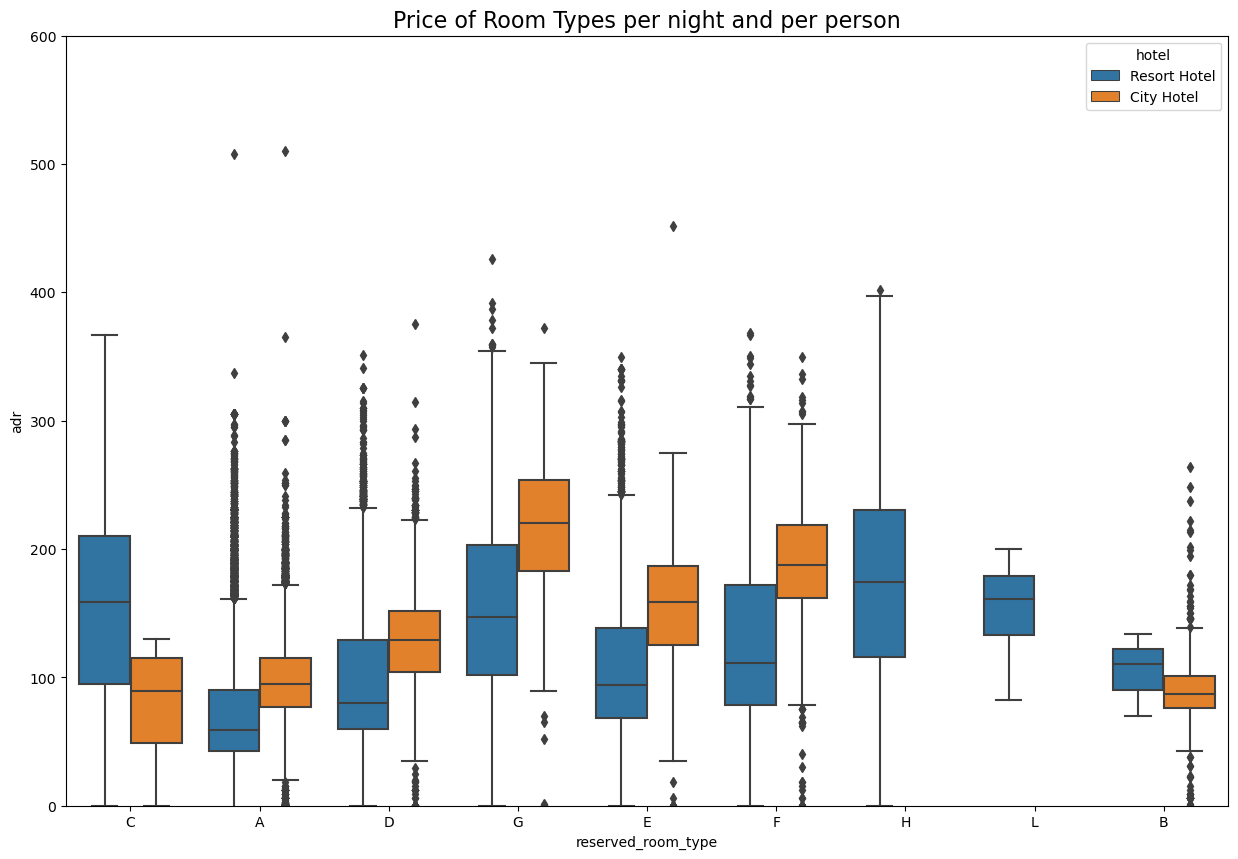

In [38]:
plt.figure(figsize=(15,10))
sns.boxplot(data=data2, x="reserved_room_type", y="adr", hue='hotel')
plt.ylim([0,600])
plt.title('Price of Room Types per night and per person', fontsize=16)

#### 4. How does the price per night vary over the year ?

In [39]:
resort_data = resort[resort["is_canceled"]==0].copy()

city_data = city[city["is_canceled"]==0].copy()

In [40]:
resort_data["reservation_status_date"] = pd.to_datetime(resort_data["reservation_status_date"])

city_data["reservation_status_date"] = pd.to_datetime(city_data["reservation_status_date"])

In [41]:
resort_data.set_index("reservation_status_date", inplace=True)

city_data.set_index("reservation_status_date", inplace=True)

In [42]:
resort_hotel = resort_data.groupby("arrival_date_month")["adr"].mean().reset_index()

In [43]:
city_hotel = city_data.groupby("arrival_date_month")["adr"].mean().reset_index()

In [44]:
resort_hotel.sample(2)

arrival_date_month         adr
6                June  107.974850
10            October   61.775449

In [45]:
merged = pd.merge(left=resort_hotel, right=city_hotel, on="arrival_date_month", how="inner")
merged.columns= ["month", "resort_price", "city_price"]

In [46]:
merged.head()

month  resort_price  city_price
0     April     75.867816  111.962267
1    August    181.205892  118.674598
2  December     68.410104   88.401855
3  February     54.147478   86.520062
4   January     48.761125   82.330983

In [47]:
!pip install sorted-months-weekdays
!pip install sort-dataframeby-monthorweek

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [48]:
import sort_dataframeby_monthorweek as sd

In [49]:
merged2 = sd.Sort_Dataframeby_Month(merged, 'month')

In [50]:
merged2.head()

month  resort_price  city_price
0   January     48.761125   82.330983
1  February     54.147478   86.520062
2     March     57.056838   90.658533
3     April     75.867816  111.962267
4       May     76.657558  120.669827

In [51]:
px.line(data_frame=merged2, x="month", y=["resort_price", "city_price"], title="Room price per night over the year")

<Axes: xlabel='reservation_status_date'>

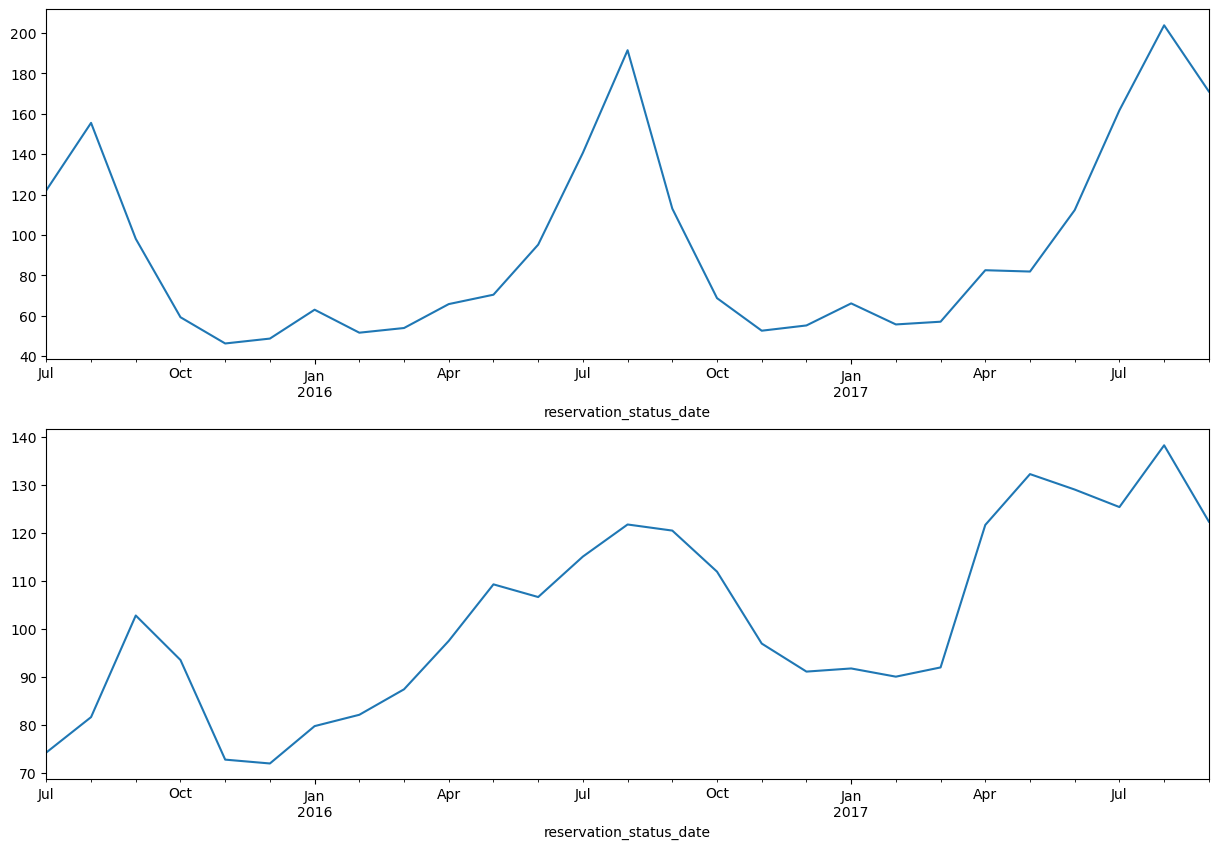

In [52]:
plt.figure(figsize=(15,10))
ax1=plt.subplot(2,1,1)
ax2=plt.subplot(2,1,2)
resort_data.resample('M')["adr"].mean().plot(ax=ax1)
city_data.resample('M')["adr"].mean().plot(ax=ax2)

#### 5. Distribution of Nights Spent at Hotels by Market Segment and Hotel Type

In [53]:
px.box(data_frame=data, x="market_segment", y="stays_in_weekend_nights", color="hotel")

In [54]:
#most people do not prefer to stay at city hotels, In case of resort hotel, they prefer to stay more

#### 6. Analysing Preference of Guests, what they basically Prefer ?

In [55]:
data["hotel"].value_counts()

hotel
City Hotel      79163
Resort Hotel    40047
Name: count, dtype: int64

In [56]:
a = data["meal"].value_counts()
a

meal
BB           92236
HB           14458
SC           10549
Undefined     1169
FB             798
Name: count, dtype: int64

In [57]:
px.pie(data_frame=a, names=a.index, values=a.values, hole=0.5)

#### 7. Analysing Special Request done by Customers

In [58]:
data

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  children  babies meal country  \
0                          0       2       0.0       0   BB     PRT   
1                          0       2       0.0       0   BB     PRT   
2                          1       1       0.0       0   BB     GBR   
3                          1       1       0.0       0   BB     GBR   
4                          2       2       0.0       0   BB     GBR   
...                      ...     ...       ...     ...  ...     ...   
119385                     5       2       0.0       0   BB     BEL   
119386                     5       3       0.0       0   BB     FRA   
119387                     5       2       0.0       0   BB     DEU   
119388                     5       2       0.0       0   BB     GBR   
119389                     7       2       0.0       0   HB     DEU   

       market_segment distribution_channel  is_repeated_guest  \
0              Direct               Direct                  0   
1              Direct               Direct                  0   
2              Direct               Direct                  0   
3           Corporate            Corporate                  0   
4           Online TA                TA/TO                  0   
...               ...                  ...                ...   
119385  Offline TA/TO                TA/TO                  0   
119386      Online TA                TA/TO                  0   
119387      Online TA                TA/TO                  0   
119388      Online TA                TA/TO                  0   
119389      Online TA                TA/TO                  0   

        previous_cancellations  previous_bookings_not_canceled  \
0                            0                               0   
1                            0        

<Axes: xlabel='total_of_special_requests', ylabel='count'>

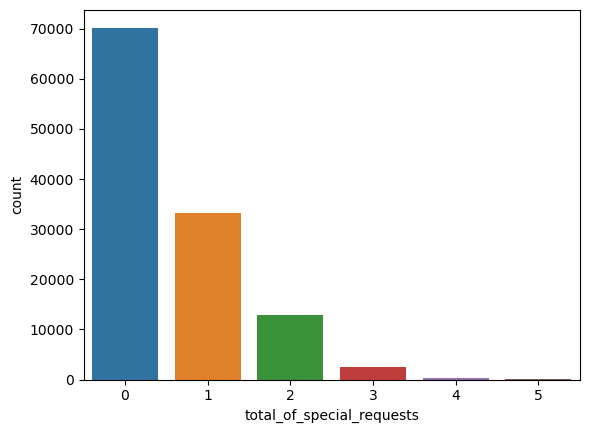

In [59]:
sns.countplot(x=data["total_of_special_requests"])

#Therefore 50 percent of bookings do not have special requests

#### 8. Create a Pivot table of relationship between special requests and cancellation booking status

In [60]:
pd.pivot_table(data=data, index="total_of_special_requests", columns="is_canceled", values="hotel", aggfunc="count")

is_canceled                    0      1
total_of_special_requests              
0                          36667  33534
1                          25867   7316
2                          10086   2866
3                           2049    445
4                            304     36
5                             38      2

In [61]:
a = pd.pivot_table(data=data, index="total_of_special_requests", columns="is_canceled", values="hotel", aggfunc="count")

<Axes: xlabel='total_of_special_requests'>

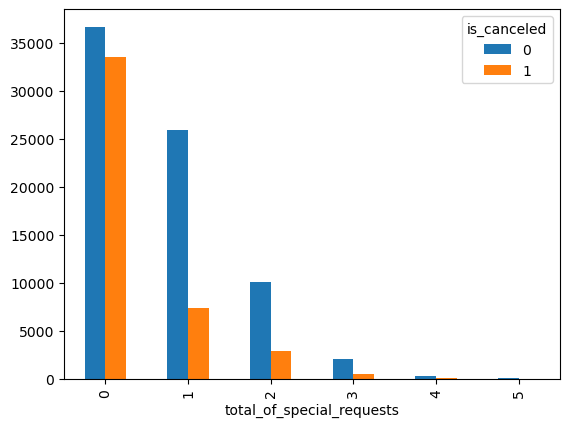

In [62]:
a.plot(kind="bar")

#### 9. Analysing most busy months

In [65]:
resort_data.head(5)

hotel  is_canceled  lead_time  \
reservation_status_date                                         
2015-07-01               Resort Hotel            0        342   
2015-07-01               Resort Hotel            0        737   
2015-07-02               Resort Hotel            0          7   
2015-07-02               Resort Hotel            0         13   
2015-07-03               Resort Hotel            0         14   

                         arrival_date_year arrival_date_month  \
reservation_status_date                                         
2015-07-01                            2015               July   
2015-07-01                            2015               July   
2015-07-02                            2015               July   
2015-07-02                            2015               July   
2015-07-03                            2015               July   

                         arrival_date_week_number  arrival_date_day_of_month  \
reservation_status_date                                                        
2015-07-01                                     27                          1   
2015-07-01                                     27                          1   
2015-07-02                                     27                          1   
2015-07-02                                     27                          1   
2015-07-03                                     27                          1   

                         stays_in_weekend_nights  stays_in_week_nights  \
reservation_status_date                                                  
2015-07-01                                     0                     0   
2015-07-01                                     0                     0   
2015-07-02                                     0                     1   
2015-07-02                                     0                     1   
2015-07-03                                     0                     2   

                         adults  children  babies meal country market_segment  \
reservation_status_date                                                         
2015-07-01                    2       0.0       0   BB     PRT         Direct   
2015-07-01                    2       0.0       0   BB     PRT         Direct   
2015-07-02                    1       0.0       0   BB     GBR         Direct   
2015-07-02                    1       0.0       0   BB     GBR      Corporate   
2015-07-03                    2       0.0       0   BB     GBR      Online TA   

                        distribution_channel  is_repeated_guest  \
reservation_status_date                                           
2015-07-01                            Direct                  0   
2015-07-01                            Direct                  0   
2015-07-02                            Direct                  0   
2015-07-02                         Corporate                  0   
2015-07-03                             TA/TO                  0   

                         previous_cancellations  \
reservation_status_date                           
2015-07-01                                    0   
2015-07-01                                    0   
2015-07-02                                    0   
2015-07-02                                    0   
2015-07-03                                    0   

                         previous_bookings_not_canceled reserved_room_type  \
reservation_status_date                                                      
2015-07-01                                            0                  C   
2015-07-01                                            0                  C   
2015-07-02                                            0                  A   
2015-07-02                                            0                  A   
2015-07-03                                            0                  A   

                        assigned_room_type  booking_changes deposit_type  \
reservation_status_da

In [70]:
rush_resort = resort_data["arrival_date_month"].value_counts().reset_index()
rush_resort.columns= ["month", "no of guests in resort"]
rush_resort.head()

month  no of guests in resort
0   August                    3257
1     July                    3137
2  October                    2575
3    March                    2571
4    April                    2550

In [71]:
rush_city = city_data["arrival_date_month"].value_counts().reset_index()
rush_city.columns= ["month", "no of guests in city"]
rush_city.head()

month  no of guests in city
0   August                  5367
1     July                  4770
2      May                  4568
3     June                  4358
4  October                  4326

In [73]:
final_rush = pd.merge(rush_resort, rush_city, on="month")
final_rush.head()

month  no of guests in resort  no of guests in city
0   August                    3257                  5367
1     July                    3137                  4770
2  October                    2575                  4326
3    March                    2571                  4049
4    April                    2550                  4010

In [ ]:
#lets sort rows by month

In [80]:
final_rush["new"] = pd.to_datetime(final_rush["month"], format="%B").dt.month

In [82]:
final_rush.sort_values(by="new", inplace=True)

In [84]:
final_rush.drop(columns=["new"],inplace=True)
final_rush.index=[i for i in range(0,12)]
final_rush.head()

month  no of guests in resort  no of guests in city
0   January                    1866                  2249
1  February                    2308                  3051
2     March                    2571                  4049
3     April                    2550                  4010
4       May                    2535                  4568

In [86]:
px.line(data_frame=final_rush, x="month", y=["no of guests in resort", "no of guests in city"], title="Total no of guests per month")

 Summer, Rainy(Monsoon) season months have more number of customers

#### 10. Analysing more about Customers

#### a. How long do people stay at the hotels

In [94]:
clean_data = data[ data["is_canceled"] ==0].copy()

In [95]:
clean_data.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  agent  company  \
0                  C                3   No Deposit    0.0      0.0   
1                  C                4   No Deposit    0.0      0.0   
2                  C                0   No Deposit    0.0      0.0   
3                  A                0   No Deposit  304.0      0.0   
4                  A                0   No Deposit  240.0      0.0   

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0                     0     Transient   0.0                            0   
1                     0     Transient   0.0                            0   
2                     0     Transient  75.0                            0   
3                     0     Transient  75.0                            0   
4                     0     Transient  98.0                            0   

   total_of_special_requests reservation_status reservation_status_date  
0                          0          Check-Out                7/1/2015  
1                          0          Check-Out                7/1/2015  
2                          0          Check-Out                7/2/2015  
3                          0          Check-Out                7/2/2015  
4                          1          Check-Out                7/3/2015

In [96]:
clean_data["total_nights"] = clean_data["stays_in_week_nights"] + clean_data["stays_in_weekend_nights"]

In [98]:
clean_data.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  agent  company  \
0                  C                3   No Deposit    0.0      0.0   
1                  C                4   No Deposit    0.0      0.0   
2                  C                0   No Deposit    0.0      0.0   
3                  A                0   No Deposit  304.0      0.0   
4                  A                0   No Deposit  240.0      0.0   

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0                     0     Transient   0.0                            0   
1                     0     Transient   0.0                            0   
2                     0     Transient  75.0                            0   
3                     0     Transient  75.0                            0   
4                     0     Transient  98.0                            0   

   total_of_special_requests reservation_status reservation_status_date  \
0                          0          Check-Out                7/1/2015   
1                          0          Check-Out                7/1/2015   
2                          0          Check-Out                7/2/2015   
3                          0          Check-Out                7/2/2015   
4                          1          Check-Out                7/3/2015   

   total_nights  
0             0  
1             0  
2             1  
3             1  
4             2

In [102]:
stay = clean_data.groupby(["total_nights","hotel"])["is_canceled"].count().reset_index()
stay.head()

total_nights         hotel  is_canceled
0             0    City Hotel          251
1             0  Resort Hotel          371
2             1    City Hotel         9155
3             1  Resort Hotel         6579
4             2    City Hotel        10983

In [103]:
stay.rename(columns={"is_canceled":"no of stays"}, inplace=True)

In [104]:
stay

total_nights         hotel  no of stays
0              0    City Hotel          251
1              0  Resort Hotel          371
2              1    City Hotel         9155
3              1  Resort Hotel         6579
4              2    City Hotel        10983
..           ...           ...          ...
57            46  Resort Hotel            1
58            48    City Hotel            1
59            56  Resort Hotel            1
60            60  Resort Hotel            1
61            69  Resort Hotel            1

[62 rows x 3 columns]

In [111]:
px.bar(data_frame = stay, x="total_nights", y="no of stays", color="hotel" )

<Axes: xlabel='total_nights', ylabel='no of stays'>

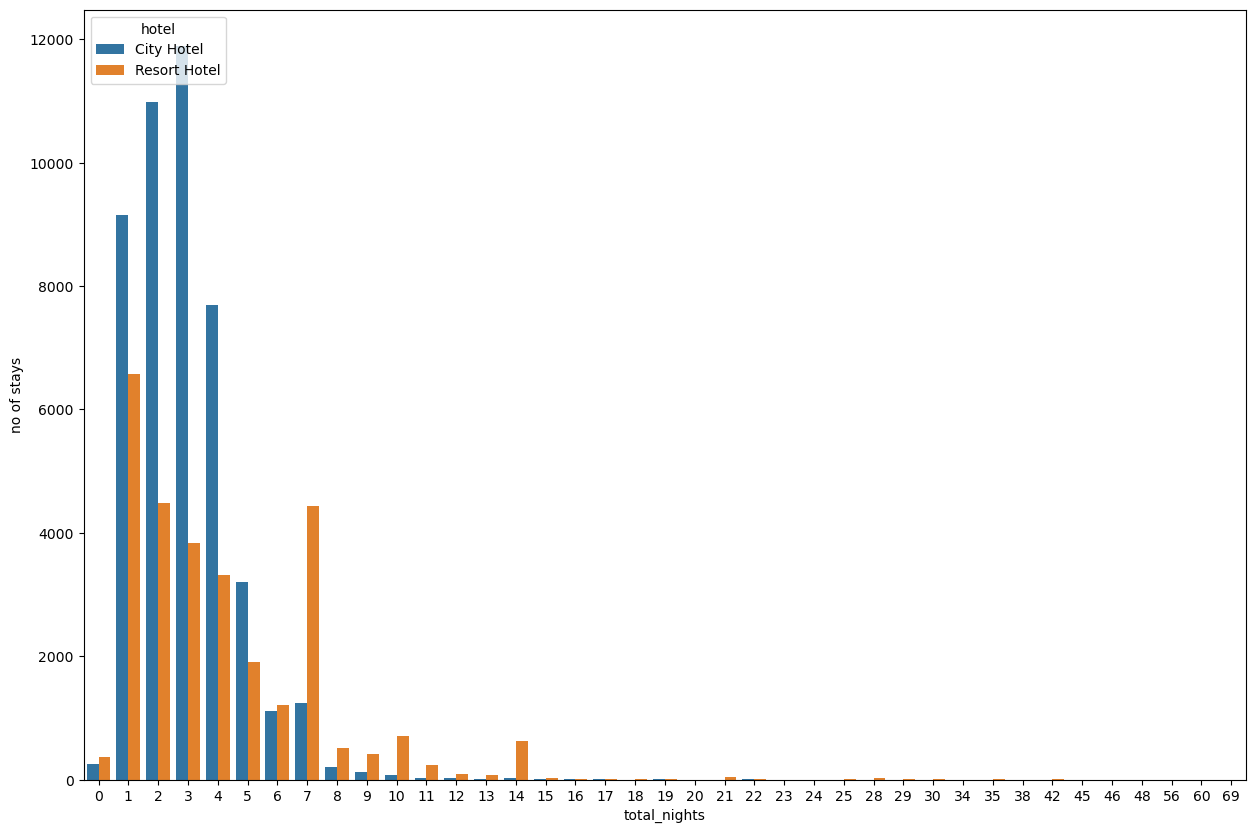

In [109]:
plt.figure(figsize=(15,10))
sns.barplot(data = stay, x="total_nights", y="no of stays", hue="hotel", hue_order=["City Hotel", "Resort Hotel"])

#### b. Bookings by market segment

In [117]:
a = clean_data["market_segment"].value_counts()
a

market_segment
Online TA        35673
Offline TA/TO    15880
Direct           10648
Groups            7697
Corporate         4291
Complementary      639
Aviation           183
Name: count, dtype: int64

In [118]:
px.pie(data_frame=a, names=a.index, values=a.values)

#### 11. Price per night (ADR) and person based on booking and room

In [124]:
# px.bar(data_frame=clean_data, x="market_segment", y="adr", color="reserved_room_type")

<Axes: xlabel='market_segment', ylabel='adr'>

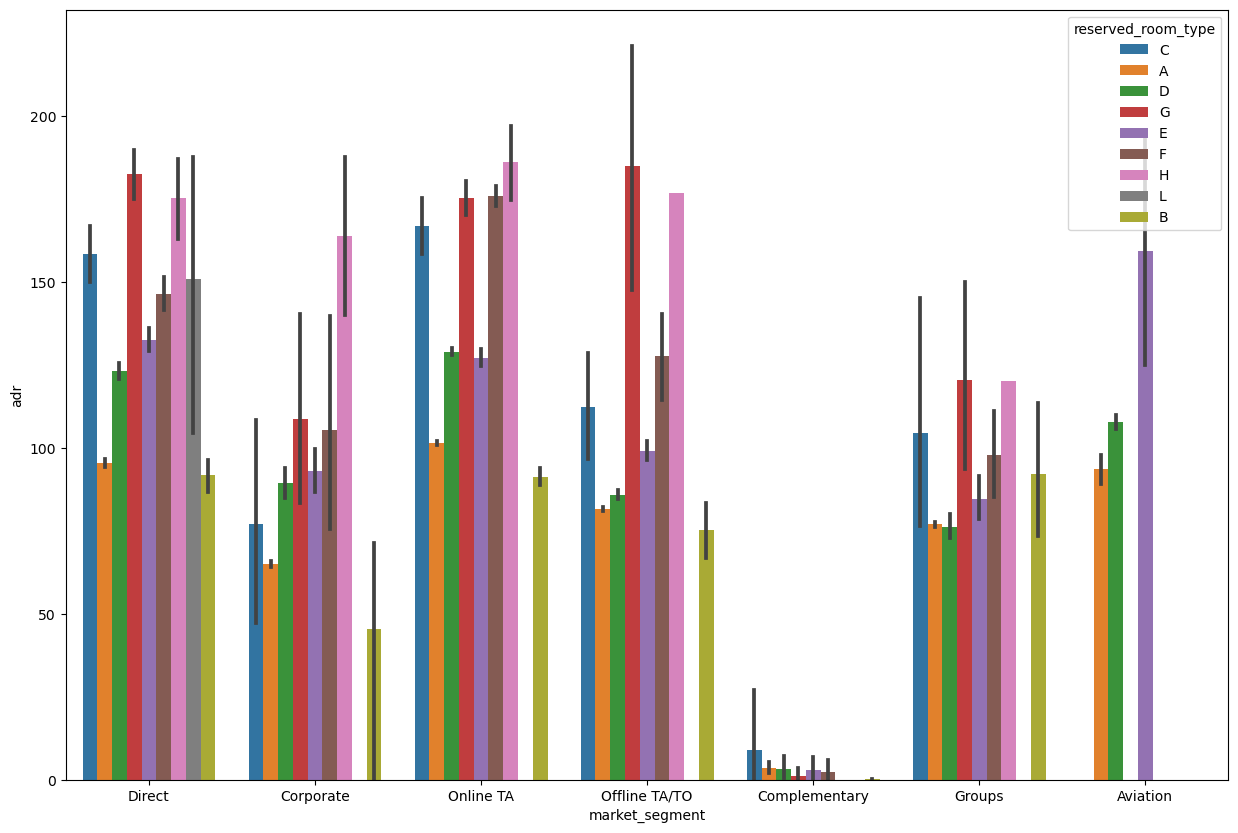

In [125]:
plt.figure(figsize=(15,10))
sns.barplot(data=clean_data, x="market_segment", y="adr", hue="reserved_room_type")

#### 12. How many bookings were cancelled ?

In [129]:
len(data[data["is_canceled"]==1])

44199

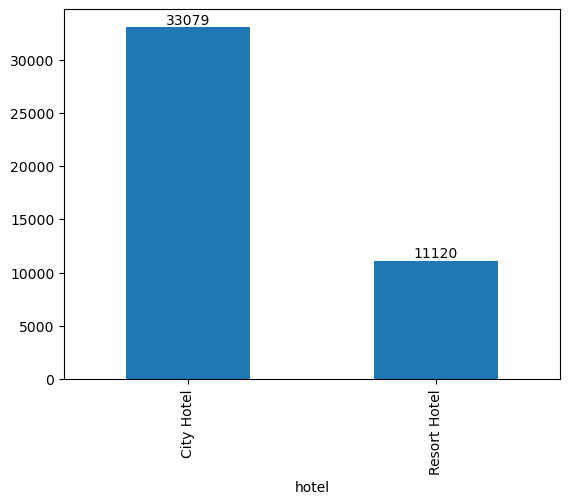

In [132]:
ax = data[data["is_canceled"]==1]["hotel"].value_counts().plot(kind="bar")
for bar in ax.containers:
    ax.bar_label(bar)

In [134]:
a = data[data["is_canceled"]==1]["hotel"].value_counts()
px.pie(data_frame=a, names=a.index, values=a.values, title="Booking Cancellations")

#### 13. Which month has the highest number of cancellations ?

<Axes: xlabel='arrival_date_month'>

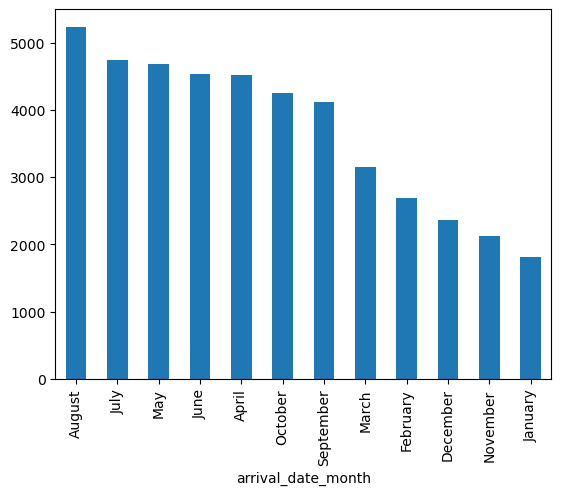

In [137]:
data[data["is_canceled"]==1]["arrival_date_month"].value_counts().plot(kind="bar")

August has more cancellations